# Nick Park - Vehicle Claim Prediction
### Predicting which policy will file claim in the next six months

In [1]:
### Import Packages ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.ensemble
import sklearn.linear_model
import sklearn.metrics

pd.set_option('display.max_columns', 150) # print all columns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 150) # print all columns

## Import Data & EDA

In [2]:
data = pd.read_csv('D:/SWP/jupyter_workspace/Interview/vehicle_claim_classification/train.csv')

In [3]:
print(data.shape)

(58592, 44)


In [4]:
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [5]:
# Features that need to be converted categorical?
# make, airbag, cylinder, gear_box, ncap_rating
# 1-6,  1-6,    3-4,      5-6,      0-5
data.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,5,Electric,5.00,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [6]:
# Check data types
## just convert make to object. leave the others
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

## Feature Engineering

In [8]:
# Convert make to string
data['make'] = data['make'].apply(str)

# Convert is_claim to string
data['is_claim'] = data['is_claim'].apply(str)

# remove policy_id 
data = data.drop('policy_id', axis = 1)

KeyError: "['policy_id'] not found in axis"

In [9]:
# separate target & feature
x = data.drop('is_claim', axis = 1)
y = data['is_claim']

# split train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0)

In [11]:
print(len(y_train[y_train == '1'])/len(y_train))
print(len(y_test[y_test == '1'])/len(y_test))

0.06407568147461842
0.0637160086471726


In [12]:
# one-hot encode features
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [13]:
# check features
y_train.info()
x_train.dtypes

<class 'pandas.core.series.Series'>
Int64Index: 41014 entries, 27314 to 2732
Series name: is_claim
Non-Null Count  Dtype 
--------------  ----- 
41014 non-null  object
dtypes: object(1)
memory usage: 640.8+ KB


policy_tenure                            float64
age_of_car                               float64
age_of_policyholder                      float64
population_density                         int64
airbags                                    int64
displacement                               int64
cylinder                                   int64
gear_box                                   int64
turning_radius                           float64
length                                     int64
width                                      int64
height                                     int64
gross_weight                               int64
ncap_rating                                int64
area_cluster_C1                            uint8
area_cluster_C10                           uint8
area_cluster_C11                           uint8
area_cluster_C12                           uint8
area_cluster_C13                           uint8
area_cluster_C14                           uint8
area_cluster_C15    

In [14]:
# normalize features
sc=StandardScaler()
scaler = sc.fit(x_train)
x_train_n = scaler.transform(x_train)
x_test_n = scaler.transform(x_test)

## Preliminary Feature Selection Using LASSO

In [15]:
# Find optimal alpha using LassoCV
m_lasso = sklearn.linear_model.LassoCV(cv=10, 
#                                        max_iter = 10000,
                                       random_state=0, verbose = 0)

m_lasso.fit(x_train_n, y_train)

lasso_alpha = m_lasso.alpha_
print(lasso_alpha)

0.0010592950088351672


In [16]:
# Fit model using the optimal alpha
m_lasso_fin = sklearn.linear_model.Lasso(alpha = lasso_alpha)

m_lasso_fin.fit(x_train_n, y_train)

# prediction on the test set
yhat_lasso = m_lasso_fin.predict(x_test_n)

In [17]:
# calculate Area Under the ROC on the test set
lasso_metric = sklearn.metrics.recall_score(y_test, yhat_lasso)
print(lasso_metric) # 0.600239191101158

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [27]:
# feature importance
lasso_coefs = pd.DataFrame({'feature_name' : list(x_train.columns),
                             'coefficient' : list(m_lasso_fin.coef_)}).sort_values(by='coefficient', ascending=False) 

print(lasso_coefs.sort_values(by='feature_name', ascending=True) )

                              feature_name   coefficient
1                               age_of_car -1.017654e-02
2                      age_of_policyholder  1.443759e-03
4                                  airbags  0.000000e+00
14                         area_cluster_C1 -1.298631e-04
15                        area_cluster_C10 -0.000000e+00
16                        area_cluster_C11 -1.390381e-04
17                        area_cluster_C12 -0.000000e+00
18                        area_cluster_C13 -4.083852e-04
19                        area_cluster_C14  0.000000e+00
20                        area_cluster_C15 -3.583401e-04
21                        area_cluster_C16  0.000000e+00
22                        area_cluster_C17 -3.806537e-05
23                        area_cluster_C18  2.140442e-03
24                        area_cluster_C19  0.000000e+00
25                         area_cluster_C2  1.552497e-03
26                        area_cluster_C20 -0.000000e+00
27                        area_

##### features to remove
airbags,
cylinder,
displacement,
fuel_type,
gear_box,
gross_weight,
height,
length,
width,
make,
turning_radius

##### 0 but kept
is_brake_assist,
is_central_locking,
is_day_night_rear_view_mirror,
is_driver_seat_height_adjustable,
is_ecw,
is_esc,
is_front_fog_lights,
is_parking_camera,
is_parking_sensors,
is_power_steering,
is_rear_window_defogger,
is_rear_window_washer,
is_rear_window_wiper,
is_speed_alert,
is_tpms,
ncap_rating,
rear_brakes_type,
steering_type
transmission_type

In [33]:
# Redefine Features
col_drop = ['airbags', 'cylinder', 'displacement', 'fuel_type', 
            'gear_box', 'gross_weight', 'height', 'length', 'width', 'make', 'turning_radius']

x2 = x.drop(columns = col_drop, axis = 1)

# split train & test
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state= 0)

# one-hot encode features
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# normalize features
sc=StandardScaler()
scaler = sc.fit(x_train)
x_train_n = scaler.transform(x_train)
x_test_n = scaler.transform(x_test)

## Prediction - Random Forest

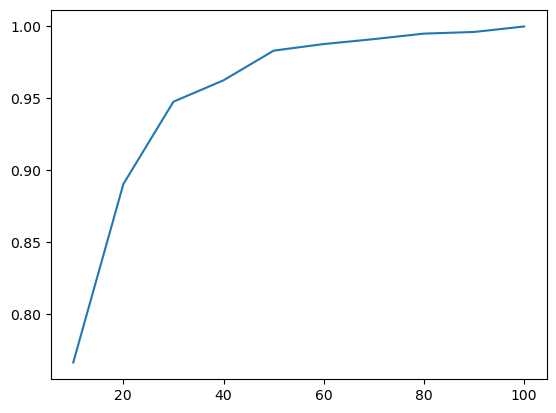

In [56]:
# number of trees
metric = []

for k in range(10, 110, 10):
    rfr = sklearn.ensemble.RandomForestClassifier(n_estimators = k)
    rfr.fit(x_train, y_train)
    pred_train = rfr.predict(x_train)
    metric.append(sklearn.metrics.recall_score(y_train, pred_train))

plt.plot(range(10, 110, 10), metric)

In [39]:
# sqrt of # of features
np.sqrt(len(x_train.columns))

10.677078252031311

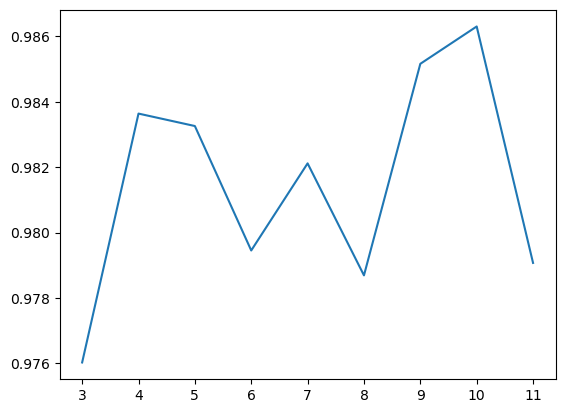

In [58]:
# max features
metric = []

for k in range(3, 12, 1):
    rfr = sklearn.ensemble.RandomForestClassifier(n_estimators = 50, max_features = k)
    rfr.fit(x_train, y_train)
    pred_train = rfr.predict(x_train)
    metric.append(sklearn.metrics.recall_score(y_train, pred_train))

plt.plot(range(3, 12, 1), metric)

In [59]:
# tune rest of the hyperparameters
grid = GridSearchCV(sklearn.ensemble.RandomForestClassifier(n_estimators = 50, 
                                                            random_state=0),
                    param_grid={'min_impurity_decrease': np.arange(0, 0.011, 0.001),
                                'ccp_alpha': np.arange(0, 0.011, 0.001)
                               }, cv=10, n_jobs=-1)

grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=50, random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ]),
                         'min_impurity_decrease': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 ])})

In [ ]:
sklearn.metrics.

In [60]:
# function for parameter & score reporting
def grid_top(cv_results, num_results = 10, asc = True):
    test = pd.DataFrame(data = [cv_results['rank_test_score'],
                                cv_results['params'], 
                                cv_results['mean_test_score']
                               ]).T
    test.columns = ['rank_test_score', 'params', 'mean_test_score']
    test = test.sort_values(by = 'rank_test_score', ascending = asc)
    print(test.head(num_results))

In [61]:
# RF grid search results
grid_top(grid.cv_results_)

   rank_test_score  \
60               1   
87               1   
86               1   
85               1   
84               1   
83               1   
82               1   
81               1   
80               1   
79               1   

                                                                 params  \
60                 {'ccp_alpha': 0.005, 'min_impurity_decrease': 0.005}   
87                  {'ccp_alpha': 0.007, 'min_impurity_decrease': 0.01}   
86  {'ccp_alpha': 0.007, 'min_impurity_decrease': 0.009000000000000001}   
85                 {'ccp_alpha': 0.007, 'min_impurity_decrease': 0.008}   
84                 {'ccp_alpha': 0.007, 'min_impurity_decrease': 0.007}   
83                 {'ccp_alpha': 0.007, 'min_impurity_decrease': 0.006}   
82                 {'ccp_alpha': 0.007, 'min_impurity_decrease': 0.005}   
81                 {'ccp_alpha': 0.007, 'min_impurity_decrease': 0.004}   
80                 {'ccp_alpha': 0.007, 'min_impurity_decrease': 0.003}   
79     

In [66]:
# evaluate using the best parameters
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators = 50, n_jobs=-1).set_params(**grid.best_params_)
rfc.fit(x_train, y_train)
y_pred_test = rfc.predict(x_test)

sklearn.metrics.recall_score(y_test, y_pred_test)

0.0

In [65]:
sklearn.metrics.classification_report(y_test, y_pred_test)

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97     16458\n           1       0.00      0.00      0.00      1120\n\n    accuracy                           0.94     17578\n   macro avg       0.47      0.50      0.48     17578\nweighted avg       0.88      0.94      0.91     17578\n'